#### Author : **Muhammad Taha** 
#### Date : 11/6/2025 
#### Email : contact.taha2005@gmail.com 
---

# Title : **Customer Segmentation Analysis**
<p align="center">
  <img src="banner.jpg" alt="Customer Segmentation Thumbnail" width="500" length="300"/>
</p>



This dataset contains basic demographic and behavioral information of mall customers. It's commonly used for **customer segmentation** using clustering techniques like KMeans.

####  Number of Records:

* **200 rows** (each row represents one customer)

####  Number of Features (Columns): 5

| Column Name              | Description                                                                 |
| ------------------------ | --------------------------------------------------------------------------- |
| `CustomerID`             | Unique identifier assigned to each customer                                 |
| `Gender`                 | Gender of the customer (`Male` or `Female`)                                 |
| `Age`                    | Age of the customer in years                                                |
| `Annual Income (k$)`     | Customer’s reported annual income in thousands of dollars                   |
| `Spending Score (1–100)` | A score assigned by the mall based on customer behavior and spending habits |



 # **Problem Statement:**
"A retail business wants to understand its customers better by segmenting them based on their demographics and spending behavior. The goal is to use customer segmentation to design more targeted and efficient marketing strategies."

In [1]:
import warnings
warnings.filterwarnings('ignore')


---

### **Importing necessary Libraries**

In [2]:
import pandas as pd         # for data manipulation
import seaborn as sns       # for visualization graphs
import matplotlib.pyplot as plt     # for visualization graphs
import numpy as np                  # for linear algebra
from sklearn.preprocessing import StandardScaler        # for scaling the data
from sklearn.cluster import KMeans                      # for model training

print('Sucessfully imported libraries')


Sucessfully imported libraries


---

### **Loading the Dataset**

In [ ]:
df = pd.read_csv('data/Mall_Customers.csv')

print('Successfully loaded the dataset')

Successfully loaded the dataset


---

### **Analyzing the Data**

In [4]:
# displaing some rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
r = df.shape[0]
c = df.shape[1]
print(f" total rows are : {r}")
print(f" total columns are : {c}")

 total rows are : 200
 total columns are : 5


In [6]:
# knowing the information about columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# finding the descritive statistical information about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **checking missing values**

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **checking duplicate rows**

In [9]:
df.duplicated().sum()

np.int64(0)

---

### **Visualization graphs**

## 1. **Gender Distribution**

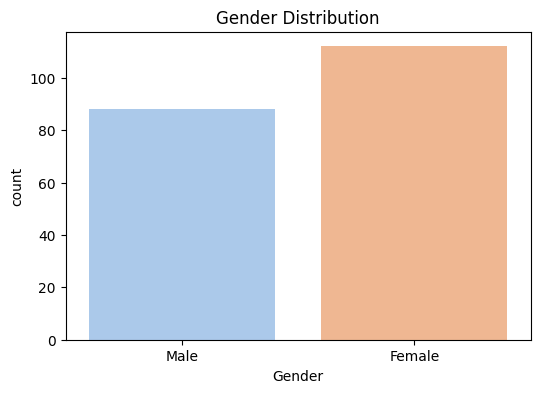

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()


- **There are more females than males in customer segmentaion data.**

## **2. Age Distribution**

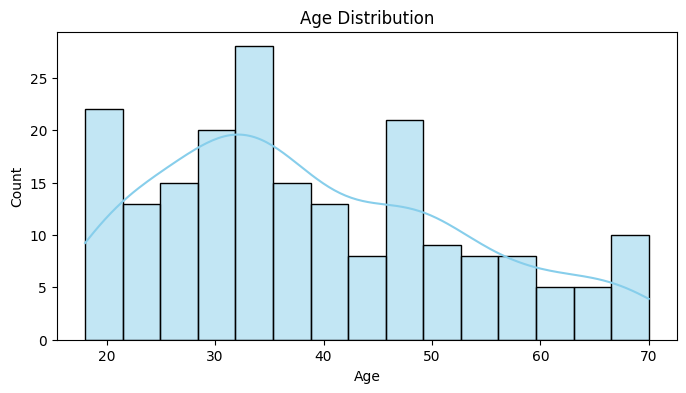

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


- **There are more cusomers who are of 20 and 35 years.**

## **3. Annual income and Spending score distribution**

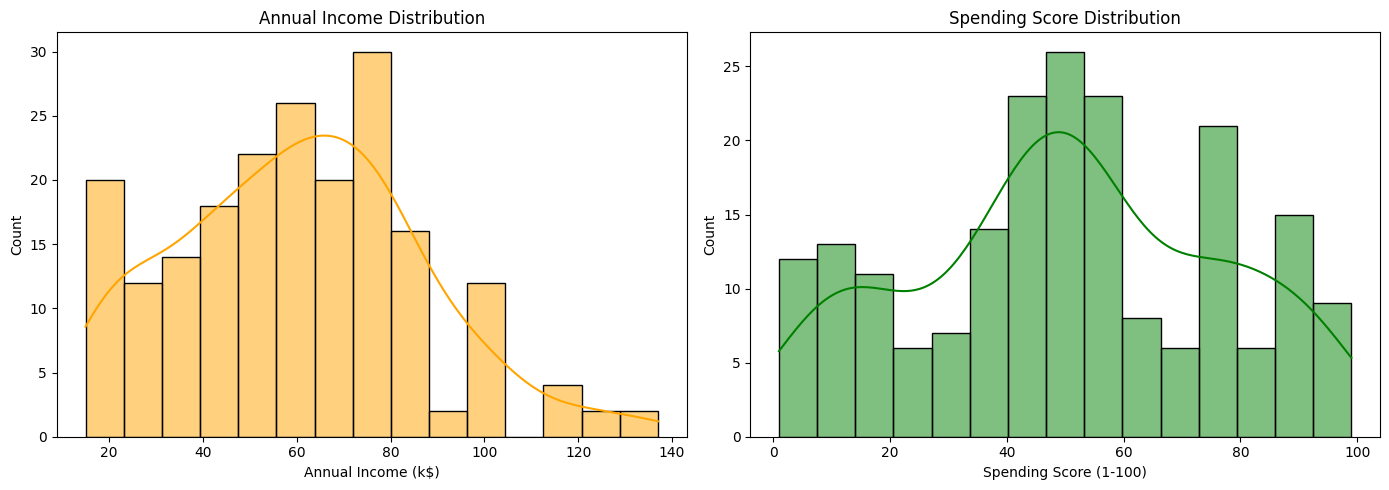

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, ax=ax[0], color='orange')
ax[0].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, ax=ax[1], color='green')
ax[1].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()


### **Annual Income:**

- Most customers earn between 40k$ and 80k$.

- Distribution is right-skewed, with fewer high-income customers.

- Peak around 70k$ suggests targeting mid-income customers.

### **Spending Score:**

- Distribution is bimodal, with peaks around 50 and 75-90.

- Customers show diverse spending behavior — some spend low, others spend high.

- Good sign for clustering into different customer segments.

## **4. Income vs Spending scatterplot**

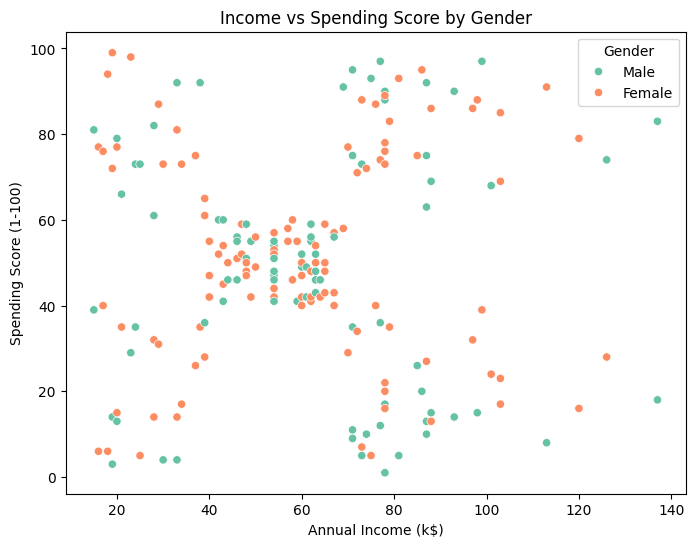

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title('Income vs Spending Score by Gender')
plt.show()


- Customers are spread across the income range, with no strong linear correlation between income and spending.

- There are clusters:

    - High income, low spending

    - High income, high spending

    - Low income, high spending

    - Middle income, average spending

- Both male and female customers are present in all clusters — no clear gender-based trend.

- Indicates a diverse customer base, suitable for clustering into behavior-based segments rather than income-based alone.

## **5. Pairwise Feature Relationships**

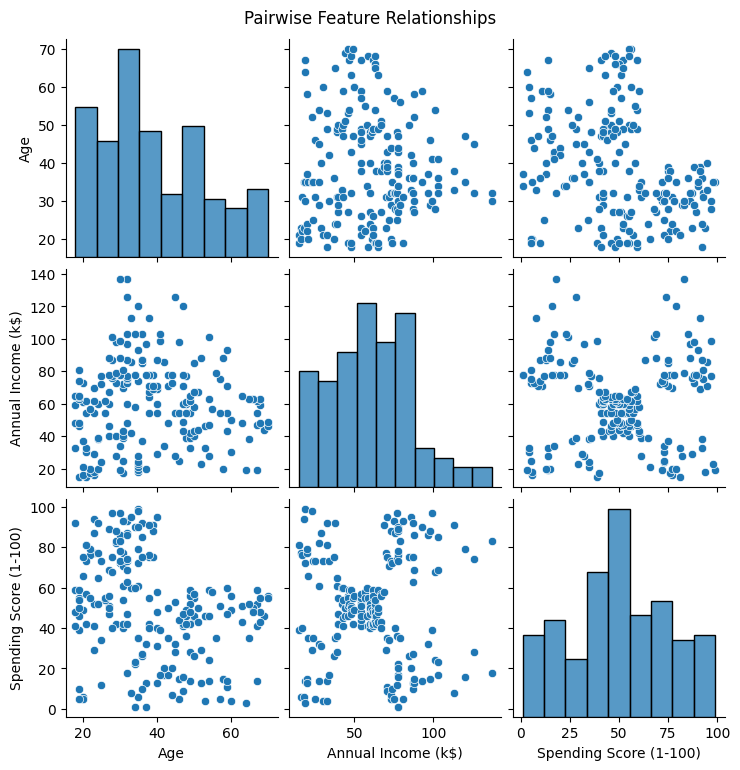

In [14]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()


- Age is right-skewed – most customers are between 30 to 40 years old.

- Annual income has a broad range, mostly between 40k$ and 80k$.

- Spending score shows no strong correlation with either age or income.

- Clear clusters appear in:

  - Income vs Spending Score: Dense group near middle income & average spending.

  - Age vs Spending Score: Spending varies widely across all age groups.

- Indicates multiple customer types, ideal for segmentation.

---

# **Data Preprocessing**

In [15]:
df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])

np.float64(0.009902848094037606)

### **Feature Selection**

In [16]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


### **Feature Scaling (Standardization)**

In [17]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [18]:
scaler.mean_

array([38.85, 60.56, 50.2 ])

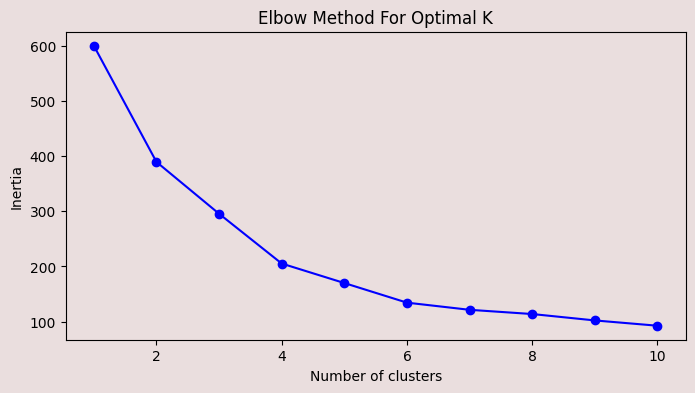

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.savefig("images/elbow_plot.png")
plt.show()
plt.close()

- **Insight:** The Elbow Method suggests that **4 clusters** is the optimal number for segmenting the customers, as the inertia drops significantly up to **K=4** and then levels off, indicating diminishing returns beyond that point.


---

# **Model Training**

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = kmeans.labels_


In [21]:
df['Cluster'].value_counts()

Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

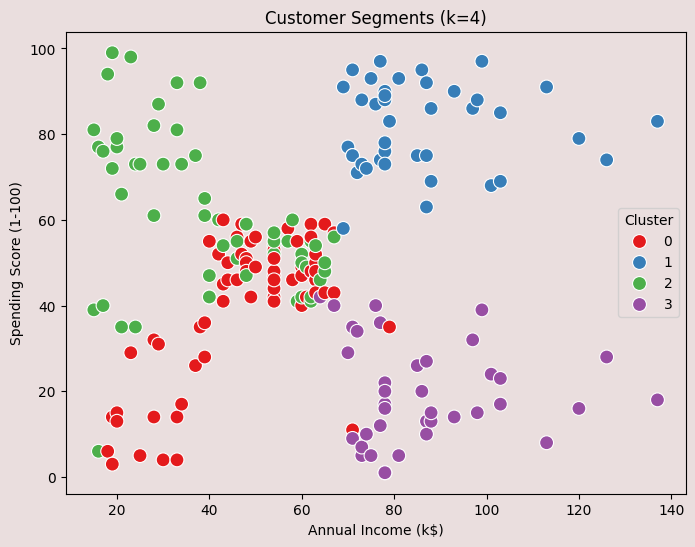

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments (k=4)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.savefig('images/cluster_plot.png')
plt.show()
plt.close()

In [23]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


## **Adding the Labels through insights**

In [24]:
# Mapping of cluster number to segment labels
label_map = {
            0: "Moderate Income, Moderate Spending",
            1: "High Income, High Spending",
            2: "Young Customers, Moderate Spending",
            3: "High Income, Low Spending"
        }

# Add a new column for segment labels
df['Segment_Label'] = df['Cluster'].map(label_map)


In [25]:
df[['CustomerID', 'Cluster', 'Segment_Label']].head()

,CustomerID,Cluster,Segment_Label
0,1,2,"Young Customers, Moderate Spending"
1,2,2,"Young Customers, Moderate Spending"
2,3,2,"Young Customers, Moderate Spending"
3,4,2,"Young Customers, Moderate Spending"
4,5,2,"Young Customers, Moderate Spending"


## **Saving the Model**

In [ ]:
import joblib

# Save model
joblib.dump(kmeans, 'models/kmeans_customer_segmentation.pkl')

# Save dataset with cluster labels
df.to_csv('customer_segments.csv', index=False)

# saving the scaler object to use it on app
joblib.dump(scaler, "models/scaler.pkl")



['scaler.pkl']


## **Thank You for Reviewing**
Thank you for following along with this notebook. If you have any questions, feedback, or suggestions, feel free to reach out. Happy coding! 

### **Connect with me:**
LinkedIn: [Muhammad Taha](https://linkedin.com/in/muhammad-taha-b88807248/) \
GitHub: [MuhammadTaha1038](https://github.com/MuhammadTaha1038)
